In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv('/kaggle/input/euro-usd-data/EUR_USD_price_2000_2025.csv')

In [3]:
df.head()

,Unnamed: 0,Date,Price,Open,High,Low,Change %,SMA_7,SMA_30,SMA_100,...,Lag_30,SMA_20,STD_20,Upper_Band,Lower_Band,High-Low,High-Close,Low-Close,TR,ATR_14
0,0,2000-03-02,0.9642,0.9732,0.9795,0.9614,-0.0095,0.977686,0.985223,0.997420,...,1.0172,0.983445,0.010607,1.004658,0.962232,0.0181,0.0061,0.0120,0.0181,0.015500
1,1,2000-03-03,0.9597,0.9646,0.9680,0.9590,-0.0047,0.971529,0.983583,0.996582,...,1.0089,0.982305,0.011864,1.006033,0.958577,0.0090,0.0038,0.0052,0.0090,0.015114
2,2,2000-03-06,0.9592,0.9577,0.9673,0.9560,-0.0005,0.966714,0.981973,0.995770,...,1.0075,0.981225,0.012943,1.007110,0.955340,0.0113,0.0076,0.0037,0.0113,0.015207
3,3,2000-03-07,0.9596,0.9590,0.9628,0.9527,0.0004,0.964629,0.980617,0.995000,...,1.0003,0.979935,0.013764,1.007463,0.952407,0.0101,0.0036,0.0065,0.0101,0.015314
4,4,2000-03-08,0.9605,0.9587,0.9632,0.9522,0.0009,0.963029,0.979270,0.994281,...,1.0009,0.978270,0.014011,1.006291,0.950249,0.0110,0.0036,0.0074,0.0110,0.015243


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6514 entries, 0 to 6513
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    6514 non-null   int64  
 1   Date          6514 non-null   object 
 2   Price         6514 non-null   float64
 3   Open          6514 non-null   float64
 4   High          6514 non-null   float64
 5   Low           6514 non-null   float64
 6   Change %      6514 non-null   float64
 7   SMA_7         6514 non-null   float64
 8   SMA_30        6514 non-null   float64
 9   SMA_100       6514 non-null   float64
 10  SMA_200       6514 non-null   float64
 11  Day           6514 non-null   object 
 12  Week          6514 non-null   int64  
 13  Month         6514 non-null   int64  
 14  Year          6514 non-null   int64  
 15  Price_Change  6514 non-null   float64
 16  Gain          6514 non-null   float64
 17  Loss          6514 non-null   float64
 18  Avg_Gain      6514 non-null 

In [5]:
# romove unnamed column
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(-1)

,Date,Price,Open,High,Low,Change %,SMA_7,SMA_30,SMA_100,SMA_200,...,Lag_30,SMA_20,STD_20,Upper_Band,Lower_Band,High-Low,High-Close,Low-Close,TR,ATR_14
0,2000-03-02,0.9642,0.9732,0.9795,0.9614,-0.0095,0.977686,0.985223,0.997420,0.997420,...,1.0172,0.983445,0.010607,1.004658,0.962232,0.0181,0.0061,0.0120,0.0181,0.015500
1,2000-03-03,0.9597,0.9646,0.9680,0.9590,-0.0047,0.971529,0.983583,0.996582,0.996582,...,1.0089,0.982305,0.011864,1.006033,0.958577,0.0090,0.0038,0.0052,0.0090,0.015114
2,2000-03-06,0.9592,0.9577,0.9673,0.9560,-0.0005,0.966714,0.981973,0.995770,0.995770,...,1.0075,0.981225,0.012943,1.007110,0.955340,0.0113,0.0076,0.0037,0.0113,0.015207
3,2000-03-07,0.9596,0.9590,0.9628,0.9527,0.0004,0.964629,0.980617,0.995000,0.995000,...,1.0003,0.979935,0.013764,1.007463,0.952407,0.0101,0.0036,0.0065,0.0101,0.015314
4,2000-03-08,0.9605,0.9587,0.9632,0.9522,0.0009,0.963029,0.979270,0.994281,0.994281,...,1.0009,0.978270,0.014011,1.006291,0.950249,0.0110,0.0036,0.0074,0.0110,0.015243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,2025-02-13,1.0464,1.0387,1.0467,1.0373,0.0079,1.037457,1.036327,1.057706,1.074550,...,1.0265,1.039315,0.005661,1.050637,1.027993,0.0094,0.0085,0.0009,0.0094,0.009357
6509,2025-02-14,1.0491,1.0465,1.0515,1.0446,0.0026,1.038729,1.036937,1.057034,1.074411,...,1.0308,1.040415,0.005288,1.050990,1.029840,0.0069,0.0051,0.0018,0.0069,0.009279
6510,2025-02-17,1.0482,1.0489,1.0507,1.0467,-0.0009,1.040171,1.037243,1.056382,1.074258,...,1.0390,1.040755,0.005566,1.051886,1.029624,0.0040,0.0016,0.0024,0.0040,0.008986
6511,2025-02-18,1.0445,1.0484,1.0488,1.0435,-0.0035,1.041857,1.037597,1.055760,1.074071,...,1.0339,1.040835,0.005609,1.052054,1.029616,0.0053,0.0006,0.0047,0.0053,0.008921


In [6]:
# changing the date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [7]:
# splitting data for test and train
X = df.drop(columns=['Target_Price'])
y = df['Target_Price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,shuffle=False)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

Train size: 5211, Test size: 1303


# Normalization

- MinMax scaling on the price_based features

In [8]:
#MinMax scaling on price baesd features

scaler = MinMaxScaler(feature_range=(0,1))
cols_to_normalize = ['Price', 'Open', 'High', 'Low']
# Fit only on training data to prevent leakage
X_train[cols_to_normalize] = scaler.fit_transform(X_train[cols_to_normalize])
X_test[cols_to_normalize] = scaler.transform(X_test[cols_to_normalize])

- Stander scaling(z_score) on technical indicators

In [9]:
# stander scaling on technical indicators
scaler = StandardScaler()
cols_to_normalize = ['SMA_7','SMA_30','SMA_100','SMA_200','RSI_14','MACD','Signal_Line','Lag_14','Lag_30','SMA_20','Upper_Band','Lower_Band','ATR_14']
X_train[cols_to_normalize] = scaler.fit_transform(X_train[cols_to_normalize])
X_test[cols_to_normalize] = scaler.transform(X_test[cols_to_normalize])

## Workflow
1. **Model Selection & Baseline Model**
2. **Experimenting with Advanced Models**
3. **Hyperparameter Tuning**
4. **Model Evaluation & Validation**
5. **Model Deployment**
6. **Documentation & Final Report**
7. **Future Improvements**

# Model Training
## Linear regression
linear regression model can not train the data with the datetime column so i am drop the date column

In [10]:
# splitting the data for the linear regression
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X,y,test_size = 0.2,shuffle=False)

print(f"Train size: {len(X_train_1)}, Test size: {len(X_test_1)}")

Train size: 5211, Test size: 1303


# normalization for the linear regression data

In [11]:
#MinMax scaling on price baesd features

scaler = MinMaxScaler(feature_range=(0,1))
cols_to_normalize = ['Price', 'Open', 'High', 'Low']
# Fit only on training data to prevent leakage
X_train_1[cols_to_normalize] = scaler.fit_transform(X_train_1[cols_to_normalize])
X_test_1[cols_to_normalize] = scaler.transform(X_test_1[cols_to_normalize])

In [12]:
# stander scaling on technical indicators
scaler = StandardScaler()
cols_to_normalize = ['SMA_7','SMA_30','SMA_100','SMA_200','RSI_14','MACD','Signal_Line','Lag_14','Lag_30','SMA_20','Upper_Band','Lower_Band','ATR_14']
X_train_1[cols_to_normalize] = scaler.fit_transform(X_train_1[cols_to_normalize])
X_test_1[cols_to_normalize] = scaler.transform(X_test_1[cols_to_normalize])

In [13]:
X_train_1 =  X_train_1.drop(columns=['Date'])
X_test_1 =  X_test_1.drop(columns=['Date'])
y_train_1 =  y_train_1.drop(columns=['Date'])
y_test_1 =  y_test_1.drop(columns=['Date'])

In [14]:
X_train_1 =  X_train_1.drop(columns=['Day'])
X_test_1 =  X_test_1.drop(columns=['Day'])
y_train_1 =  y_train_1.drop(columns=['Day'])
y_test_1 =  y_test_1.drop(columns=['Day'])

In [15]:
model_1 = LinearRegression()
model_1.fit(X_train_1, y_train_1)

LinearRegression()

In [16]:
y_pred_1 = model_1.predict(X_test_1)

In [17]:
mae = mean_absolute_error(y_test_1, y_pred_1)
mse = mean_squared_error(y_test_1, y_pred_1)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_1, y_pred_1)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

MAE: 0.003915843385709587
MSE: 2.6272649482878146e-05
RMSE: 0.0051256852695886574
R² Score: 0.9925516247535742


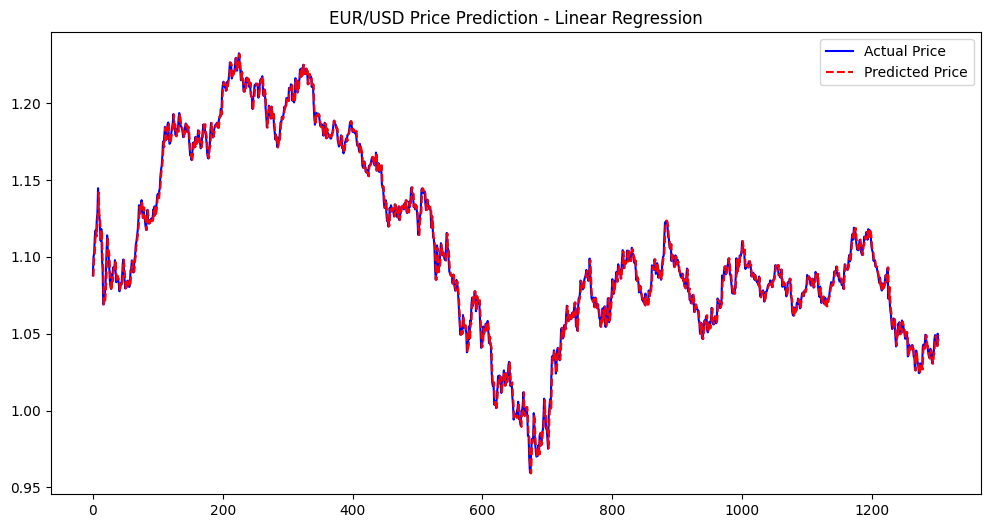

In [18]:
plt.figure(figsize=(12,6))
plt.plot(y_test_1.values, label="Actual Price", color='blue')
plt.plot(y_pred_1, label="Predicted Price", color='red', linestyle="dashed")
plt.legend()
plt.title("EUR/USD Price Prediction - Linear Regression")
plt.show()

- The linear regression is actually able to predict the price

**downloading the model and metrics to the local computer from the kaggle notebook in order to track with mlflow since mlflow does not work in kaggle notebook**

In [19]:
import joblib
import json

In [20]:
metrics = {
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R2_Score": r2
}

In [21]:
# Save the model
joblib.dump(model_1, "model_1.pkl")

['model_1.pkl']

In [22]:
# Save metrics
with open("metrics.json", "w") as f:
    json.dump(metrics, f)

In [23]:

# Zip files for download
!zip model_outputs.zip model_1.pkl metrics.json

  adding: model_1.pkl (deflated 24%)
  adding: metrics.json (deflated 20%)
